<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg "TensorFlow")

                                                                                                           Source - Wikipedia

### Table of Content

1. [TensorFlow - Regression](#section1)<br>
    - 1.1 [Linear Regression](#section101)<br>
    - 1.2 [Logistic Regression](#section102)<br>
    - 1.3 [Polynomial Regression](#section103)<br>
    - 1.4 [Multiclass Logistic Regression](#section104)<br>

<a id=section1></a>

# 1. TensorFlow - Regression

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/LR%26C.jpg"/>

                                                                                                      Source - Slideshare

In a __linear regression__ problem, we aim to __predict the output of a continuous value__, like a __price or a probability__. Contrast this with a __classification/logistic regression__ problem, where we aim to __predict a discrete label__ (for example, whether a __picture contains an apple or an orange__).

<a id=section101></a>

## 1.1 Linear Regression

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/stick%20jokes%20UHA.png"/>

                                                                                                      Source - Quora

Simple linear regression is a statistical method that allows us to __summarize and study relationships between two continuous (quantitative) variables__:

* One variable, denoted __x__, is regarded as the predictor, explanatory, or __independent__ variable.
* The other variable, denoted __y__, is regarded as the response, outcome, or __dependent__ variable.

Using the training data, a __regression line__ is obtained which will give __minimum error__. This linear equation is then used for any new data. That is, if we give number of hours studied by a student as an input, our model should predict their mark with minimum error.

$Y(pred) = b0 + b1*x$

The values __b0 and b1 must be chosen__ so that they __minimize the error__. If sum of squared error is taken as a metric to evaluate the model, then we aim to obtain a line that best reduces the error.

### 1. Importing the Libraries
Without further ado, let's dive into the code, starting with importing the libraries

In [9]:
from __future__ import print_function
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

### 2. Set the Hyperparameters
Initialize the hyperparameters which will be used for training the model later on. 

In [10]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

### 3. Generate the Dataset
To create the dataset, we make a custom numpy array for the purpose of this example. (We will see how to do this via sklearn in a later example)

In [11]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

### 4. Set Input Variables
Defining the variables for the session. __Placeholders X and Y__ will be __fed in__ via X_train and Y_train __during the session__. __Weights and biases change during the session__, hence the __variable declaration for them__.

Also, we do __random initializaton for the weights and biases.__

In [18]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

### 5. Define the Model
Let's define the model. Here we use the equation $y$ or $pred = X*W+b$. Here __W is the slope and b is the intercept.__

Note that we use gradient descent as an optimizer for this model. We will study how it works later on.

In [20]:
# Construct a linear model Y = WX+B
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error. reduce_sum just calculates the sum of the parameters given.
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
# Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

### 6. Train the Model
* We __train the model__ and __plot the regression curve__ (line). 
* See how the __cost decreases with each epoch__ and the __weights and biases are updated.__ 

In [34]:
# Open session. We don't use 'with' here as this session will continue to further code blocks.
sess = tf.Session() 

# Run the initializer
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        
print("Optimization Finished!")

training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0050 cost= 0.078190282 W= 0.26916927 b= 0.6606402
Epoch: 0100 cost= 0.078050226 W= 0.26800516 b= 0.66901493
Epoch: 0150 cost= 0.077926435 W= 0.26691014 b= 0.6768919
Epoch: 0200 cost= 0.077817008 W= 0.26588026 b= 0.68430084
Epoch: 0250 cost= 0.077720284 W= 0.2649117 b= 0.691269
Epoch: 0300 cost= 0.077634789 W= 0.2640007 b= 0.69782275
Epoch: 0350 cost= 0.077559263 W= 0.26314393 b= 0.70398664
Epoch: 0400 cost= 0.077492535 W= 0.2623379 b= 0.7097845
Epoch: 0450 cost= 0.077433549 W= 0.26157993 b= 0.7152377
Epoch: 0500 cost= 0.077381440 W= 0.2608669 b= 0.720367
Epoch: 0550 cost= 0.077335402 W= 0.26019645 b= 0.7251907
Epoch: 0600 cost= 0.077294752 W= 0.25956586 b= 0.72972727
Epoch: 0650 cost= 0.077258825 W= 0.2589725 b= 0.7339949
Epoch: 0700 cost= 0.077227093 W= 0.25841478 b= 0.73800826
Epoch: 0750 cost= 0.077199072 W= 0.25789 b= 0.7417832
Epoch: 0800 cost= 0.077174351 W= 0.25739634 b= 0.74533373
Epoch: 0850 cost= 0.077152506 W= 0.2569323 b= 0.74867207
Epoch: 0900 cost= 0.077133216 W= 0

### 7. Plot the Prediction
Now that the training is done, we can __plot our model on the training set__ to check how our __line fits the data.__

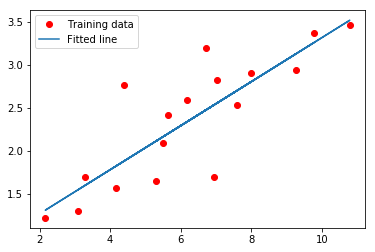

In [35]:
# Plotting the line
plt.plot(train_X, train_Y, 'ro', label='Training data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

### 8. Test the Model
Finally, we __test the model__ on the testing dataset and plot our prediction (again, we make a dummy test set).

Testing... (Mean square loss Comparison)
Testing cost= 0.078023
Absolute mean square loss difference: 0.0009218231


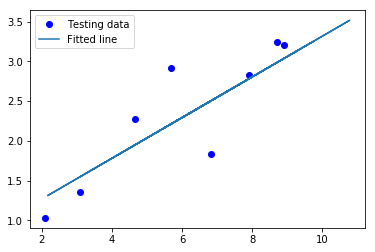

In [36]:
# Testing example
test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

print("Testing... (Mean square loss Comparison)")
# same function as cost above
testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]), feed_dict={X: test_X, Y: test_Y})  
print("Testing cost=", testing_cost)
print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

plt.plot(test_X, test_Y, 'bo', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()
#sess.close()

## KERAS 

In [51]:
train_X

array([ 3.3  ,  4.4  ,  5.5  ,  6.71 ,  6.93 ,  4.168,  9.779,  6.182,
        7.59 ,  2.167,  7.042, 10.791,  5.313,  7.997,  5.654,  9.27 ,
        3.1  ])

In [52]:
train_Y

array([1.7  , 2.76 , 2.09 , 3.19 , 1.694, 1.573, 3.366, 2.596, 2.53 ,
       1.221, 2.827, 3.465, 1.65 , 2.904, 2.42 , 2.94 , 1.3  ])

In [54]:
from keras.layers import Dense, Input
from keras.models import Model

In [125]:
inp = Input((4,))
x = Dense(5, activation='relu')(inp)
x = Dense(4, activation='relu')(x)
out = Dense(3, activation='sigmoid')(x)

model = Model(inp, out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 4)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 15        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [122]:
model.fit(train_X, train_Y, epochs=100, verbose=0)

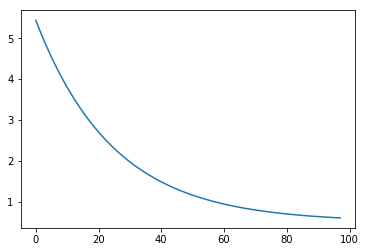

In [124]:
plt.plot(model.history.history.get('loss')[2:])

In [95]:
predictions = model.predict(test_X)

In [98]:
mean_absolute_error(predictions, test_Y)

0.31930058228969577

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/1d0eaa4ffd9e5e0a311f0873b3a195aa.gif"/>

                                                                                                      Source - Pinterest
Now that we're done with trying do fit a line on points, let's try to classify images through logistic regression.

<a id=section102></a>

## 1.2 Logistic Regression

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/lr%20jk.jpg"/>

                                                                                                      Source - Meme Generator


Logistic Regression is a __classification algorithm__. It is used to predict a binary outcome __(1 / 0, Yes / No, True / False)__ given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of __logistic regression as a special case of linear regression__ when the __outcome variable is categorical__, where we are using log of odds as dependent variable. In simple words, it __predicts the probability of occurrence of an event__ by fitting data to a logit function.

 Logistic Regression is used when the __dependent variable(target) is categorical.__

For example,

* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

We know the linear regression line is represented as $X*W+b$. Let's call this function as $z=X*W+b$. Then the equation for logistic regression can be defined as the probability- $y(z) = 1/(1+e^{-z})$ 



### 0. Problem Description
The dummy data we create for this example is a replica of the __student study hours dataset__. It has __two features, hours studied and hours slept.__

### 1. Importing the Libraries 
* We use sklearn to generate data values this time, this can be done by using `make_blobs`
* MinMaxScaler is used to scale/normalize the values

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [0]:
X_data = [[0.1, 0.4, 5.2, 1.8, 8.2, 7.6, 5.5, 1.6, 3.2, 2.1, 7.7, 0.3, 6.4, 8.3, 9.8, 3.5, 8.2, 2.3, 5.5, 3.9],
          [0.2, 2.3, 6.9, 2.0, 4.3, 7.8, 4.8, 9.8, 2.2, 3.9, 4.0, 7.2, 0.7, 0.1, 9.5, 4.4, 3.0, 2.9, 9.5, 8.8]]
y_data = [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]

The __0/1 values__ in y indicate if the student __failed/passed.__

### 2. Plot the Data
Reviewing the data is important. Below we plot the scatterplot of the dataset and observe how is it distributed.

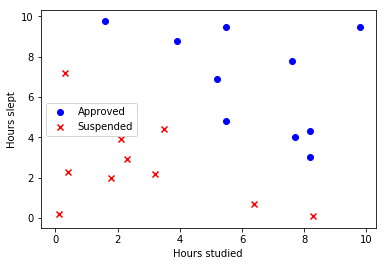

In [0]:
X_data = np.array(X_data)
Y_data = np.array(y_data)
pos = np.where(Y_data == 1)
neg = np.where(Y_data == 0)
plt.scatter(X_data.T[pos, 0], X_data.T[pos, 1], marker='o', c='b')
plt.scatter(X_data.T[neg, 0], X_data.T[neg, 1], marker='x', c='r')
plt.xlabel('Hours studied')
plt.ylabel('Hours slept')
plt.legend(['Approved', 'Suspended'])
plt.show()

Observe how __students with less study or sleep hours are suspended__ and vice-versa for approved.

### 3. Split the Data
Further, we need to __split the data into train-test datasets__. For this dummy example, we split 15:5 for the train-test split.

In [0]:
#Split the data in train & test
X = X_data[:, :]
# Get the result (0 suspended - 1 approved)
Y = Y_data
#x_train, y_train = X_data.T[:15,:15], y_data[:15]
#x_test, y_test = X_data.T[15:,:], y_data[15:] 

Y_reshape = Y_data.reshape(Y_data.shape[0], 1)
x_train, x_test, y_train, y_test = train_test_split(X.T, Y_reshape)

print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

num_features = x_train.shape[1]
print (x_test)

x_train shape: (15, 2)
y_train shape: (15, 1)
x_test shape: (5, 2)
y_test shape: (5, 1)
[[5.5 4.8]
 [3.2 2.2]
 [0.3 7.2]
 [0.4 2.3]
 [0.1 0.2]]


### 4. Set Input Features 
* Now let's __set the hyperparameters and the variables__ for the model. __X and Y are placeholders__ to hold the values during the session. 
* __Weights and biases are variables__ which have been initialized and __will be updated during the session__.

In [0]:
learning_rate = 0.001
training_epochs = 1000

tf.reset_default_graph()

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
#W = tf.Variable(rng.randn(), name="W")
#b = tf.Variable(rng.randn(), name="b")

# Initialize our weigts & bias
W = tf.get_variable("W", [num_features, 1], initializer = tf.contrib.layers.xavier_initializer())
b = tf.get_variable("b", [1], initializer = tf.zeros_initializer())

# Do forward propagation
Z = tf.add(tf.matmul(X, W), b)

### 5. Define the Model
Defining the model, with its cost, optimizer and initializing all variables (cost_history keeps track of the cost as it goes down) -

In [0]:
prediction = tf.nn.sigmoid(Z)

# Calculate the cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y))

# Use Adam as optimization method
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

cost_history = np.empty(shape=[1],dtype=float)

### 6. Train the Model
Finally, we start the session and train the model. 

In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={X: x_train, Y: y_train})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        cost_history = np.append(cost_history, c)
        
        
    # Calculate the correct predictions
    correct_prediction = tf.to_float(tf.greater(prediction, 0.5))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(Y, correct_prediction)))

    print ("Train Accuracy:", accuracy.eval({X: x_train, Y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: x_test, Y: y_test}))

Epoch: 0001 cost= 2.537041187 W= [[0.9756231]
 [1.0118337]] b= [-0.00039787]
Epoch: 0002 cost= 2.533389807 W= [[0.974001 ]
 [1.0109053]] b= [-0.00079573]
Epoch: 0003 cost= 2.529738188 W= [[0.9723789]
 [1.0099769]] b= [-0.00119358]
Epoch: 0004 cost= 2.526087046 W= [[0.9707569]
 [1.0090485]] b= [-0.00159142]
Epoch: 0005 cost= 2.522435904 W= [[0.96913487]
 [1.0081201 ]] b= [-0.00198924]
Epoch: 0006 cost= 2.518784523 W= [[0.9675129]
 [1.0071918]] b= [-0.00238705]
Epoch: 0007 cost= 2.515134096 W= [[0.96589094]
 [1.0062635 ]] b= [-0.00278485]
Epoch: 0008 cost= 2.511483431 W= [[0.96426904]
 [1.0053352 ]] b= [-0.00318263]
Epoch: 0009 cost= 2.507832766 W= [[0.96264714]
 [1.0044069 ]] b= [-0.0035804]
Epoch: 0010 cost= 2.504182339 W= [[0.9610253]
 [1.0034788]] b= [-0.00397816]
Epoch: 0011 cost= 2.500532389 W= [[0.95940346]
 [1.0025506 ]] b= [-0.00437591]
Epoch: 0012 cost= 2.496882200 W= [[0.9577817]
 [1.0016224]] b= [-0.00477364]
Epoch: 0013 cost= 2.493232489 W= [[0.9561599]
 [1.0006943]] b= [-0.

Epoch: 0196 cost= 1.830137730 W= [[0.66033  ]
 [0.8316545]] b= [-0.07760172]
Epoch: 0197 cost= 1.826556563 W= [[0.65872216]
 [0.8307373 ]] b= [-0.07799461]
Epoch: 0198 cost= 1.822975993 W= [[0.6571145]
 [0.8298202]] b= [-0.07838745]
Epoch: 0199 cost= 1.819396496 W= [[0.65550697]
 [0.82890326]] b= [-0.07878025]
Epoch: 0200 cost= 1.815817237 W= [[0.6538996 ]
 [0.82798636]] b= [-0.079173]
Epoch: 0201 cost= 1.812238693 W= [[0.65229243]
 [0.8270696 ]] b= [-0.0795657]
Epoch: 0202 cost= 1.808661342 W= [[0.65068537]
 [0.8261529 ]] b= [-0.07995836]
Epoch: 0203 cost= 1.805084467 W= [[0.6490785]
 [0.8252364]] b= [-0.08035097]
Epoch: 0204 cost= 1.801508427 W= [[0.6474718 ]
 [0.82431996]] b= [-0.08074352]
Epoch: 0205 cost= 1.797933102 W= [[0.6458652]
 [0.8234036]] b= [-0.08113603]
Epoch: 0206 cost= 1.794358492 W= [[0.6442588 ]
 [0.82248735]] b= [-0.08152849]
Epoch: 0207 cost= 1.790784597 W= [[0.6426526 ]
 [0.82157123]] b= [-0.0819209]
Epoch: 0208 cost= 1.787211657 W= [[0.6410465]
 [0.8206552]] b= [

Epoch: 0382 cost= 1.187087774 W= [[0.36663038]
 [0.6639261 ]] b= [-0.14932159]
Epoch: 0383 cost= 1.183848500 W= [[0.36510488]
 [0.6630488 ]] b= [-0.1496952]
Epoch: 0384 cost= 1.180613160 W= [[0.36358038]
 [0.6621719 ]] b= [-0.15006863]
Epoch: 0385 cost= 1.177381516 W= [[0.36205688]
 [0.66129535]] b= [-0.15044184]
Epoch: 0386 cost= 1.174153924 W= [[0.36053437]
 [0.6604192 ]] b= [-0.15081486]
Epoch: 0387 cost= 1.170930147 W= [[0.35901287]
 [0.6595435 ]] b= [-0.15118767]
Epoch: 0388 cost= 1.167710185 W= [[0.35749242]
 [0.6586682 ]] b= [-0.15156028]
Epoch: 0389 cost= 1.164494395 W= [[0.35597298]
 [0.65779334]] b= [-0.15193267]
Epoch: 0390 cost= 1.161282778 W= [[0.35445458]
 [0.6569189 ]] b= [-0.15230486]
Epoch: 0391 cost= 1.158075094 W= [[0.35293725]
 [0.65604484]] b= [-0.15267684]
Epoch: 0392 cost= 1.154871345 W= [[0.35142097]
 [0.6551712 ]] b= [-0.1530486]
Epoch: 0393 cost= 1.151672006 W= [[0.3499058]
 [0.654298 ]] b= [-0.15342015]
Epoch: 0394 cost= 1.148476720 W= [[0.34839168]
 [0.65342

Epoch: 0569 cost= 0.691788077 W= [[0.112623 ]
 [0.5117504]] b= [-0.21349275]
Epoch: 0570 cost= 0.689972878 W= [[0.11152362]
 [0.5110368 ]] b= [-0.21379153]
Epoch: 0571 cost= 0.688168406 W= [[0.11042795]
 [0.5103247 ]] b= [-0.2140897]
Epoch: 0572 cost= 0.686374605 W= [[0.10933599]
 [0.50961417]] b= [-0.21438727]
Epoch: 0573 cost= 0.684591532 W= [[0.10824776]
 [0.5089052 ]] b= [-0.21468422]
Epoch: 0574 cost= 0.682819128 W= [[0.10716327]
 [0.5081977 ]] b= [-0.21498056]
Epoch: 0575 cost= 0.681057334 W= [[0.10608253]
 [0.5074918 ]] b= [-0.21527627]
Epoch: 0576 cost= 0.679306269 W= [[0.10500555]
 [0.50678754]] b= [-0.21557137]
Epoch: 0577 cost= 0.677565932 W= [[0.10393234]
 [0.5060848 ]] b= [-0.21586585]
Epoch: 0578 cost= 0.675836384 W= [[0.10286292]
 [0.5053837 ]] b= [-0.2161597]
Epoch: 0579 cost= 0.674117386 W= [[0.10179728]
 [0.50468415]] b= [-0.21645294]
Epoch: 0580 cost= 0.672409177 W= [[0.10073546]
 [0.5039862 ]] b= [-0.21674556]
Epoch: 0581 cost= 0.670711577 W= [[0.09967744]
 [0.50328

Epoch: 0746 cost= 0.517167032 W= [[-0.02067609]
 [ 0.41428864]] b= [-0.25645402]
Epoch: 0747 cost= 0.516809881 W= [[-0.02109741]
 [ 0.4139138 ]] b= [-0.25664353]
Epoch: 0748 cost= 0.516457021 W= [[-0.02151557]
 [ 0.4135408 ]] b= [-0.25683254]
Epoch: 0749 cost= 0.516108334 W= [[-0.02193061]
 [ 0.41316968]] b= [-0.25702104]
Epoch: 0750 cost= 0.515763879 W= [[-0.02234252]
 [ 0.41280043]] b= [-0.25720903]
Epoch: 0751 cost= 0.515423477 W= [[-0.02275133]
 [ 0.41243303]] b= [-0.25739655]
Epoch: 0752 cost= 0.515087247 W= [[-0.02315705]
 [ 0.41206747]] b= [-0.25758356]
Epoch: 0753 cost= 0.514755130 W= [[-0.02355969]
 [ 0.41170377]] b= [-0.2577701]
Epoch: 0754 cost= 0.514426887 W= [[-0.02395926]
 [ 0.4113419 ]] b= [-0.25795612]
Epoch: 0755 cost= 0.514102697 W= [[-0.02435579]
 [ 0.41098186]] b= [-0.25814167]
Epoch: 0756 cost= 0.513782382 W= [[-0.02474928]
 [ 0.41062367]] b= [-0.25832674]
Epoch: 0757 cost= 0.513465941 W= [[-0.02513975]
 [ 0.4102673 ]] b= [-0.2585113]
Epoch: 0758 cost= 0.513153315 

 [ 0.37074485]] b= [-0.28465]
Epoch: 0928 cost= 0.491127044 W= [[-0.05902863]
 [ 0.37060434]] b= [-0.28478223]
Epoch: 0929 cost= 0.491085470 W= [[-0.05909448]
 [ 0.37046453]] b= [-0.2849143]
Epoch: 0930 cost= 0.491044223 W= [[-0.05915936]
 [ 0.37032548]] b= [-0.28504622]
Epoch: 0931 cost= 0.491003364 W= [[-0.0592233 ]
 [ 0.37018713]] b= [-0.28517798]
Epoch: 0932 cost= 0.490962863 W= [[-0.05928629]
 [ 0.37004954]] b= [-0.28530958]
Epoch: 0933 cost= 0.490922749 W= [[-0.05934833]
 [ 0.36991265]] b= [-0.285441]
Epoch: 0934 cost= 0.490882963 W= [[-0.05940944]
 [ 0.3697765 ]] b= [-0.2855723]
Epoch: 0935 cost= 0.490843594 W= [[-0.05946963]
 [ 0.36964104]] b= [-0.28570342]
Epoch: 0936 cost= 0.490804493 W= [[-0.05952891]
 [ 0.36950627]] b= [-0.2858344]
Epoch: 0937 cost= 0.490765691 W= [[-0.05958727]
 [ 0.36937222]] b= [-0.28596523]
Epoch: 0938 cost= 0.490727305 W= [[-0.05964473]
 [ 0.36923885]] b= [-0.28609592]
Epoch: 0939 cost= 0.490689218 W= [[-0.0597013 ]
 [ 0.36910617]] b= [-0.28622645]
Epo

Due to lesser number of points in testing set, our accuracy is dismal. This will improve dramatically as we start using actual datasets.

<a id=section103></a>

## 1.3 Polynomial Regression

Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex?
Polynomial Regression involves higher powers of independant variable. 

To generate a higher order equation we can add powers of the original features as new features. The linear model,

$Y=b0+b1X$

can be transformed to

$Y=b0+b1X+b2X^2$

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/maxresdefault.jpg"/>

                                                                                                  Source - SuperDataScience

Note that this is different from multivariate regression, which involves multiple independant variables (x1, x2, ....., xn). Instead of working with higher dimensions in multivariate regression, we work with higher powers of a single variable.

Let's dive into the workings of the code - 

### 1. Import the Libraries

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\gdev\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 2. Plot the Data

We observe how the __data cannot be properly fitted by a linear model.__ We will __need a non-linear curve.__

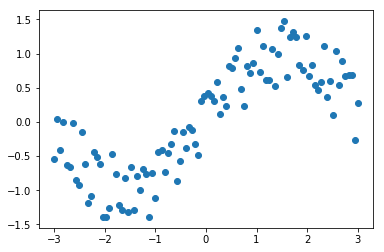

In [0]:
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
plt.draw()

### 3. Set the Input Features/Variables

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

* Instead of a single factor and a bias, we'll create a polynomial function of different polynomial degrees. 
* We will then learn the influence that each degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).

In [0]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

### 4. Define the Model

Loss function will measure the distance between our observations and predictions and average over them.

In [0]:
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

* Use gradient descent to optimize W,b
* Performs a single step in the negative gradient

In [0]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### 5. Train the Model

* We __create a session__ to use the graph.
* Here we tell tensorflow that we want to __initialize all the variables__ in the graph so we can use them.
* The code below mostly involves __feeding x and y values to their respective placeholders.__ Rest is just appending the values for plotting.

In [0]:
n_epochs = 500
with tf.Session() as sess:
    # initialize the variables
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        print(epoch_i, training_cost)
        
        if epoch_i % 100 == 0:
            ax.plot(xs, Y_pred.eval(feed_dict={X: xs}, session=sess), 'k', alpha=epoch_i / n_epochs)
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.0001:
            break
        prev_training_cost = training_cost
ax.set_ylim([-3, 3])

0 224.41045
1 51.582634
2 10.264693
3 1.785782
4 0.8207263
5 1.198943
6 1.5930846
7 1.8167993
8 1.9071476
9 1.9184983
10 1.8880105
11 1.8370868
12 1.777222
13 1.7143649
14 1.6515131
15 1.5901184
16 1.5308552
17 1.4739945
18 1.4196068
19 1.3676642
20 1.3180931
21 1.2707964
22 1.2256747
23 1.1826228
24 1.1415389
25 1.1023252
26 1.0648911
27 1.0291452
28 0.9950036
29 0.9623866
30 0.93121856
31 0.90142643
32 0.87294394
33 0.84570426
34 0.819648
35 0.79471517
36 0.7708529
37 0.7480072
38 0.7261294
39 0.70517224
40 0.68509144
41 0.6658451
42 0.64739156
43 0.62969506
44 0.61271846
45 0.5964275
46 0.58078986
47 0.56577516
48 0.5513536
49 0.53749794
50 0.5241816
51 0.51137966
52 0.49906847
53 0.487226
54 0.4758302
55 0.4648609
56 0.4542988
57 0.44412595
58 0.4343246
59 0.4248782
60 0.41577122
61 0.40698862
62 0.39851618
63 0.39034033
64 0.3824486
65 0.3748286
66 0.3674686
67 0.36035758
68 0.35348487
69 0.34684068
70 0.34041566
71 0.3342006
72 0.32818687
73 0.32236597
74 0.31673038
75 0.31127262

(-3, 3)

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/082918_1030_LinearClass5.png"/>

<a id=section104></a>